<a href="https://colab.research.google.com/github/lima-breno/data_vizualization/blob/main/DV_01_Cria%C3%A7%C3%A3o_de_gr%C3%A1ficos_Seaborn_e_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01 - Conhecendo os dados Matplotlib

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso 02 - Avançado em Python/0. Dados utilizados/imigrantes_canada.csv')
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [ ]:
# Os dados estão redondinhos! Não apresenta dados nulos, estao como inteiros e strings

##Tarefa 01: Analisar as tendências de imigração do Brasil em um determinado período

### Ajustando os dados

In [ ]:
# Para isso, precisamos mudar o index para deixar com os países. Isto vai facilitar a vida na hora da pesquisa!
  # o inplace = True faz com que o comando seja aplicado direto no Df, sem ter que criar um novo DF

df.set_index('País', inplace=True)

In [ ]:
# Criar uma variável que irá armazenar todo o período de tempo

    #map -> a ideia é criar uma lista dos anos em formato srt. Colocamos 2014 pois ela vai pega dados até 2013
anos = list(map(str, range(1980, 2014)))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [ ]:
# Vamos pegar os dados de todos os anos apenas para o Brasil

brasil = df.loc['Brasil', anos]
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brasil, dtype: object

In [ ]:
# Para facilitar vamos colocar esse DF dentro de um dicionario
    # comando tolist( faz a conversao de uma series para uma lista)
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
    # criando efetivamente um DataFrame com os dados do brasil_dict
dados_brasil = pd.DataFrame(brasil_dict)

In [ ]:
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


### Criando o gráfico com Matplotlib

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x78d25cfbf700>,
 [Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000')])

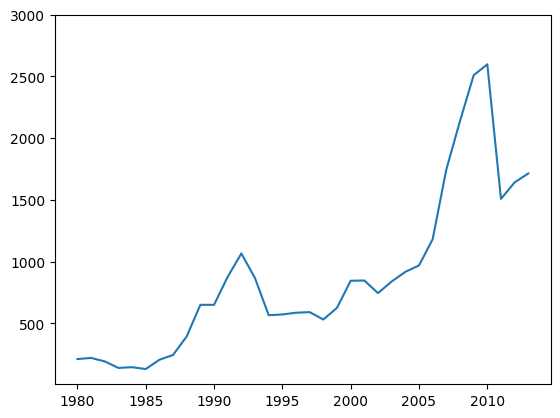

In [ ]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
# Podemos ajustar quais dados queremos deixar no eixo X da seguinte maneira (xticks)
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
# Da mesma maneira que fizemos para o x, podemos fazer para o y
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])


# É possível verificar que para qlqer função que trate de plot, antes do grafico aparece os dados de onde estao
  ## Salvos os dados na memoria. Um exemplo está abaixo:

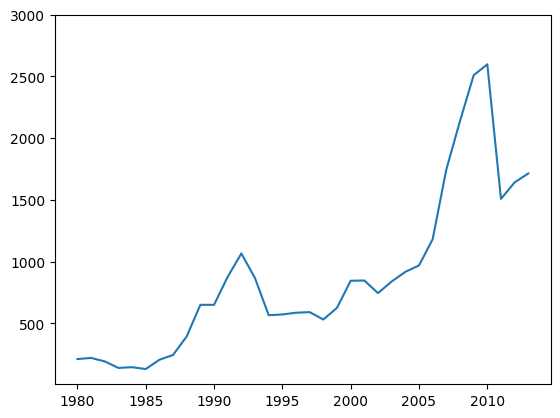

In [ ]:
# Para plotar um grafico sem que apresente os dados dele, podemos fazer da seguinte maneira
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
# Basta acrescentar o seguinte comando:
plt.show()

In [ ]:
# CUIDADO:
  # sempre que usar o .show() em python! Pois tudo que estiver abaixo dele não será executado!
  # ele deve ser a ultima linha do código, SEMPRE!

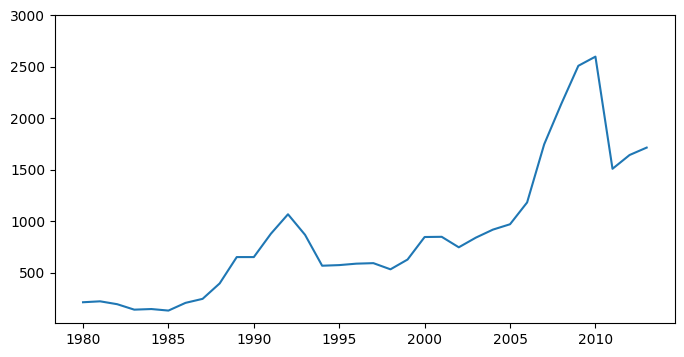

In [ ]:
# Podemos mudar também o tamanho do nosso gráfico!
  # Para poder fazer isso podemos utlizar o comando plt.figure
    # os valores apresentados estão em polegada, primeiro é passado a largura e depois a altura

plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
plt.show()

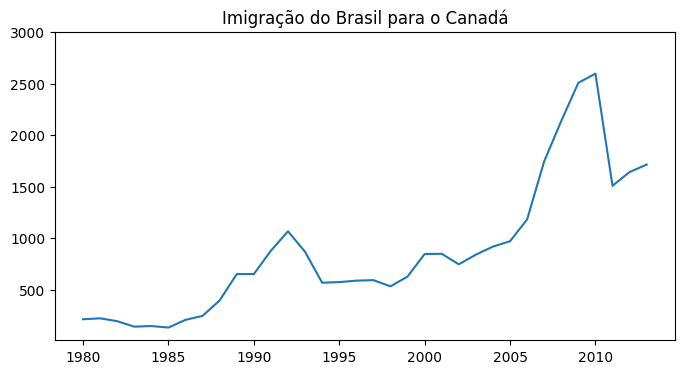

In [ ]:
# Adicionando título
  # com a função plt.title

plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
plt.show()

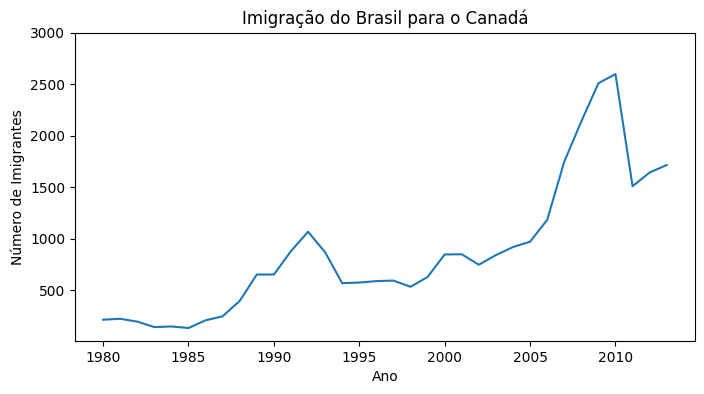

In [ ]:
# Adicionando os rótulos aos eixos
  # com os comandos xlabel e ylabel

plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
plt.show()

##Desafio 01: Comparar dados da Argentina e Brasil

Após criar o gráfico analise o resultado obtido e reflita nas seguintes questões:

1. Há alguma tendência ou padrão comum nos dados dos dois países?
2. Quais são os períodos com maior número de imigrantes nos dois países?

In [ ]:
# criando o DataFrame para comparar os dados da argentina e do brasil

df_comparacao = df.loc[['Brasil', 'Argentina'], anos]
df_comparacao

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
País,,,,,,,,,,,,,,,,,,,,,
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282


In [ ]:
# Temos uma linha para cada país e as colunas contendo os números de imigrantes para cada ano
    # o dataframe tem que ser transposto!

df_comparacao = df_comparacao.T
df_comparacao.head()

País,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


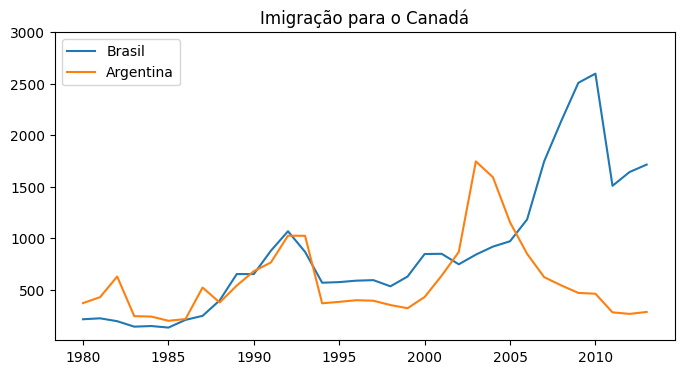

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df_comparacao['Brasil'], label = 'Brasil')
plt.plot(df_comparacao['Argentina'], label = 'Argentina')
plt.title('Imigração para o Canadá')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
plt.legend()
plt.show()

# Aula 02 - Criando Figuras com Matplotlibfig

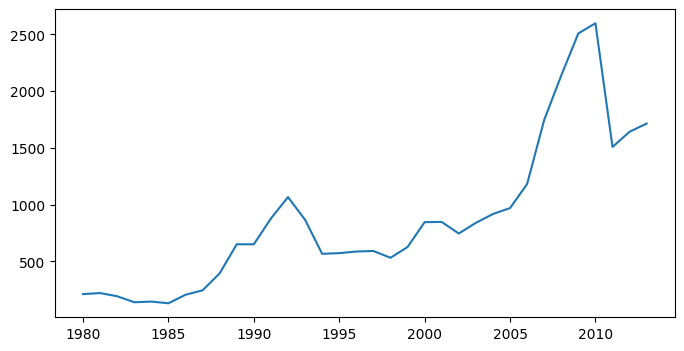

In [ ]:
# Criando figura
    # função subplots permite a criação de figuras

# Variaveis envolvidas
  ## fig = permite  que seja criada uma figura (espaço em branco)
  ## ax = se refere aos eixos

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
# modifficando o eixo x para que frequencia seja de 5
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

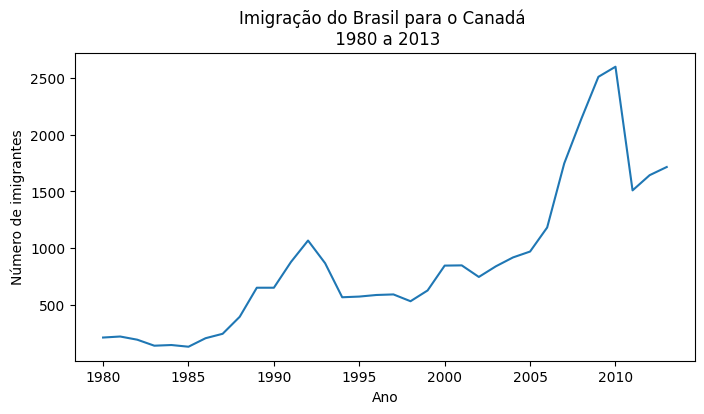

In [ ]:
# adicionando rótulos e títulos na Figura

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])

#aqui a sintaxe muda um pouco por se tratar de  uma figura
#para separar o título em duas linhas, podeemos utilizar \n
ax.set_title('Imigração do Brasil para o Canadá \n 1980 a 2013')

# acrescentar os rótulos
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()


## Gráficos com estatística junto (BOXPLOT)
  Plotando dois gráficos de uma vez em uma única figura

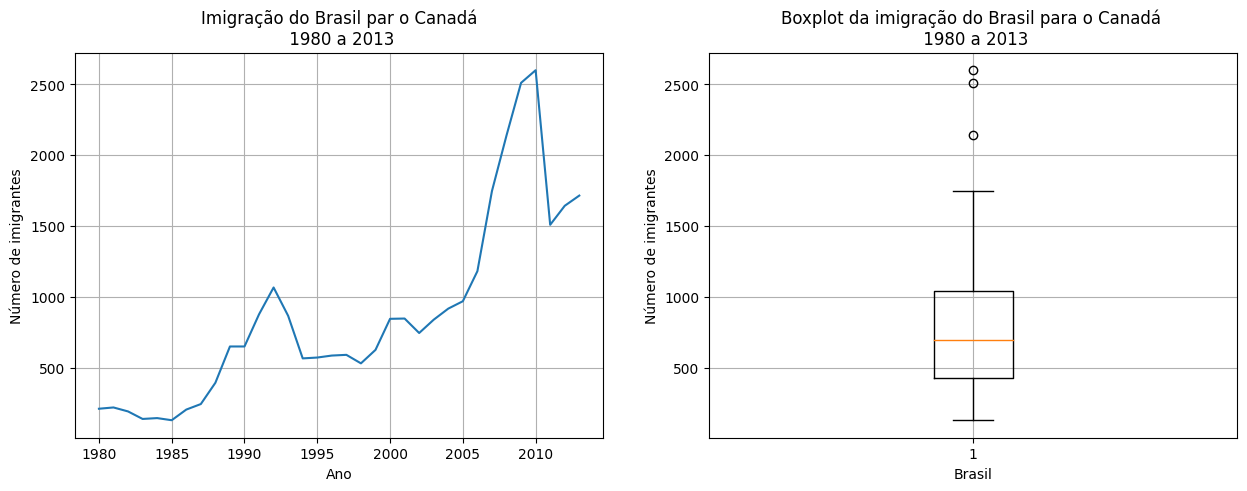

In [ ]:
#Função subplot(n de linhas, n de colunas do subplot, tamanho da figura)

fig, axs = plt.subplots(1,2, figsize=(15,5))

# Criando 2 subplots, um grafico de linhas e um boxplot

  # Primeiro grafico axs[0] - Grafico de linhas
axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil par o Canadá\n 1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

  # Segundo gráfico axs[1] - Grafico boxplot
axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Boxplot da imigração do Brasil para o Canadá \n 1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')
axs[1].grid()
plt.show()

In [ ]:
# Verificando os valores estatísticos certinhos dos dados

dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


##Analisando as tendencias de imigração dos países da America do sul
(considerando os maiores, chile, argentina, colombia e brasil)

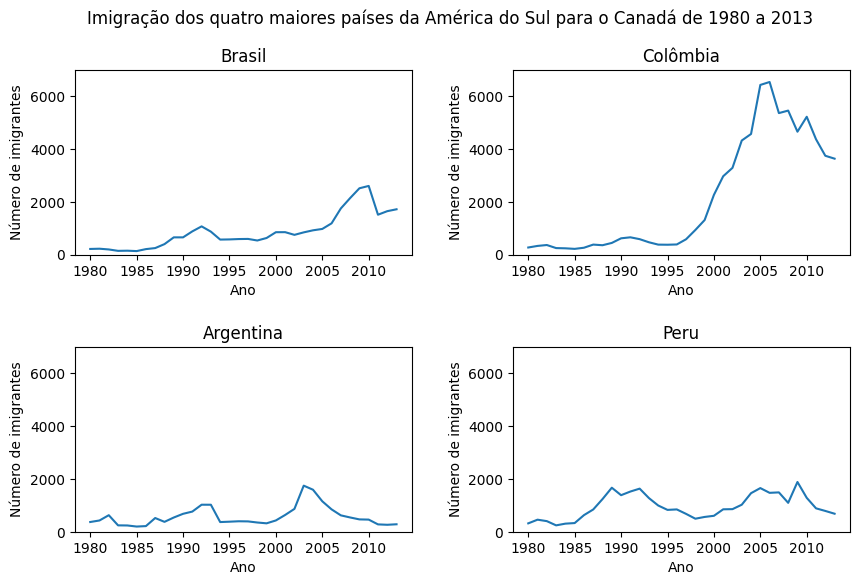

In [ ]:
# Criando figura

fig, axs = plt.subplots(2,2, figsize =(10,6))

#ajustando o espaçamento entre os graficos (hspace controla o espacamento horizontal e o wspace controla o vertical)
fig.subplots_adjust(hspace=0.5, wspace =0.3)

#acrescntando um título geral para a imagem
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013')

# como tem mais de 1 linha e 1 coluna, precisamoes especificar a posição qd utilizarmos o axs[ , ]
axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

#acrescentando o espaçamento dos dados a cada 5 anos

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

#Acrescentando os rótulos para cada grafico
for ax in axs.flat:
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de imigrantes')

#Acrescentando os valores mín e máx ao eixo y
ymin = 0
ymax = 7000
    # O método ravel possui a finalidade de transformar um array em bidimensional em um unidimensional
for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

plt.show()

###Desafio Aula 02 -> está separado!!

#Aula 03 - Customizando com Matplotlib

In [ ]:
# Mudando o grafico da Imigração do Brasil para o Canadá (1980 a 2013)

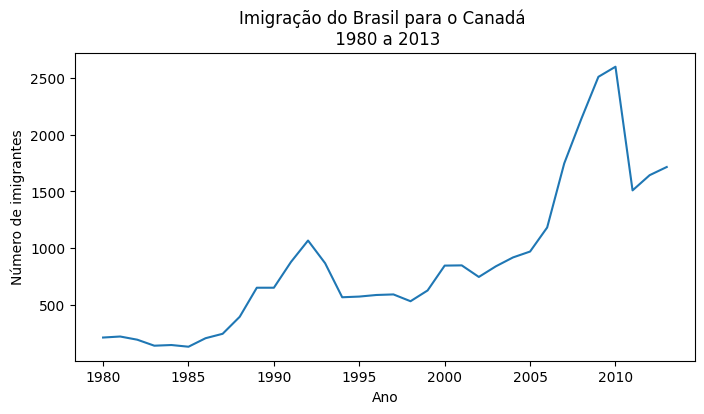

In [ ]:
# Retornando o grafico para trabalharmos
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá \n 1980 a 2013')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

### Mexendo em marcadores, rótulos, etc

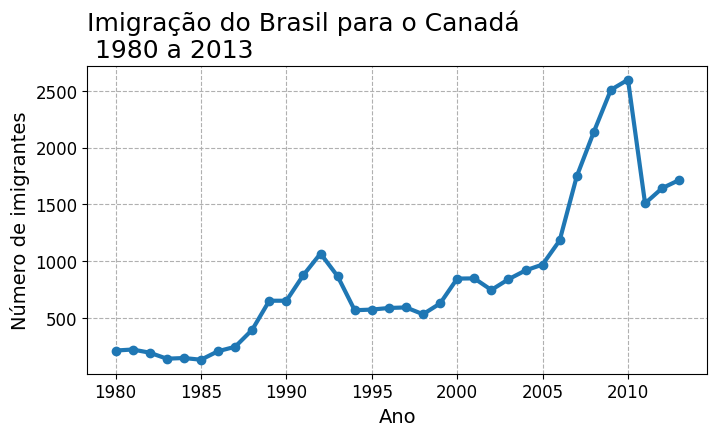

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))

# alterando a espessura de uma linha(lw)
# adicionar marcadores na linha nos pontos em que tem dados (pode sobrecarregar a visualização, n é muito legal usar)
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, marker = 'o')

# alterando o tamanho da fonte com o fontsize
# alterando a posição do titulo com o comando loc
ax.set_title('Imigração do Brasil para o Canadá \n 1980 a 2013', fontsize= 18, loc = 'left')

# alterando o tamanho da fonte dos rótulos
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize = 14)


# alerando o tick size (Numeros)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Colocando uma malha no grafico
# grid mais suavizado com o linestyle
plt.grid(linestyle = '--')

plt.show()

### Ajustando o gráfico


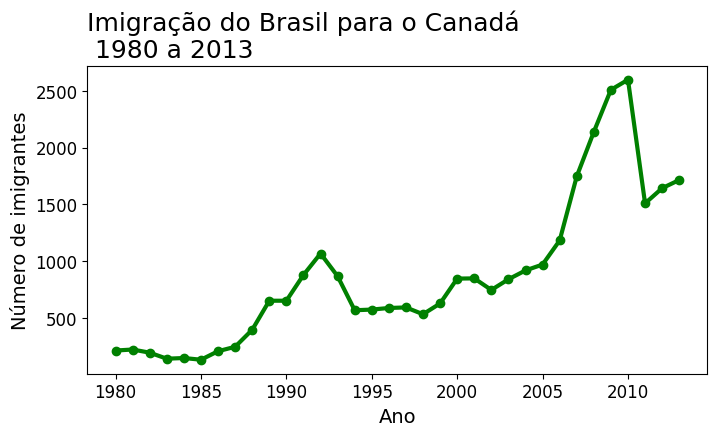

In [ ]:
#Puxando os dados anteriores

fig, ax = plt.subplots(figsize = (8,4))

# Alterando a cor da linha para verde (pega a primeira letra apenas)
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, marker = 'o', color ='g')
ax.set_title('Imigração do Brasil para o Canadá \n 1980 a 2013', fontsize= 18, loc = 'left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

In [ ]:
# Colocando os dados dos paises da america latina dentro de um unico grafico

df.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
#Fazendo a pesquisa da america do sul

america_sul = df.query('Região == "América do Sul"')
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


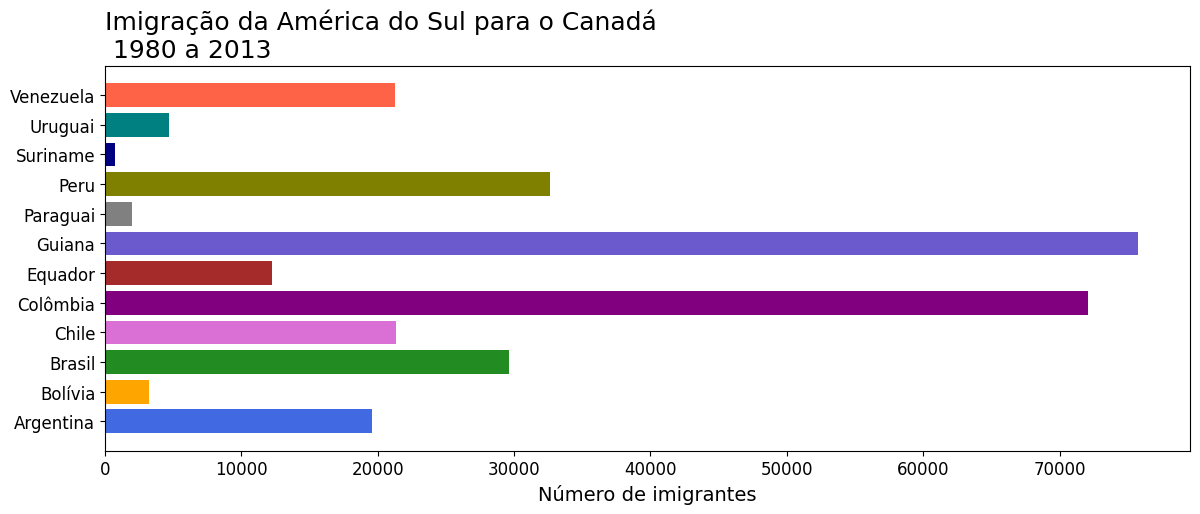

In [ ]:
#Plotar o grafico do numero total de imigraçoes para cada paises (grafico em barras)

fig, ax = plt.subplots(figsize = (14,5))

# Crido uma lista de cores
cores = ['royalblue',  'orange', 'forestgreen','orchid','purple', 'brown','slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

# Pegando os dados gerais e colocando-os no grafico
ax.barh(america_sul.index, america_sul['Total'], color = cores)

#título para grafico
ax.set_title('Imigração da América do Sul para o Canadá \n 1980 a 2013', loc = 'left', fontsize = 18)

# rótulos
ax.set_xlabel('Número de imigrantes', fontsize = 14)
ax.set_ylabel('')

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

In [ ]:
# Bom pegar o tutorial do matplotlib.org para verificar as cores possíveis

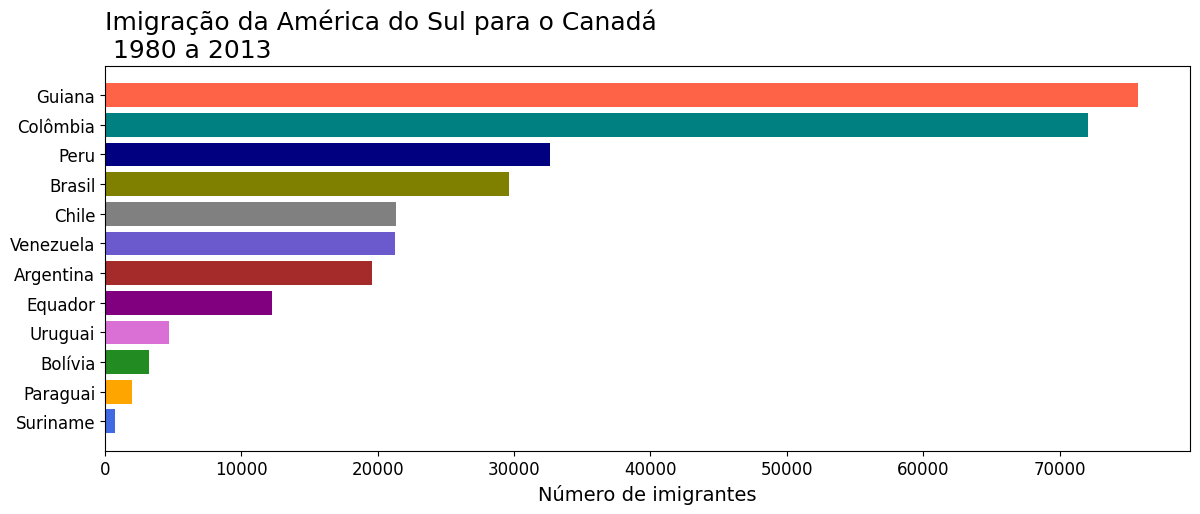

In [ ]:
# Posso organizar o gráfico em barras horizontais de maneira que fique do pais com mais imigrações para o de menos
# Organizando o DF primeiro!

america_sul_sorted = america_sul.sort_values('Total', ascending = True)

# Para poder ajustar o gráffico, basta rodar o comando novamente, só que com o DF que foi reorganizado

fig, ax = plt.subplots(figsize = (14,5))
cores = ['royalblue',  'orange', 'forestgreen','orchid','purple', 'brown','slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color = cores)
ax.set_title('Imigração da América do Sul para o Canadá \n 1980 a 2013', loc = 'left', fontsize = 18)
ax.set_xlabel('Número de imigrantes', fontsize = 14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

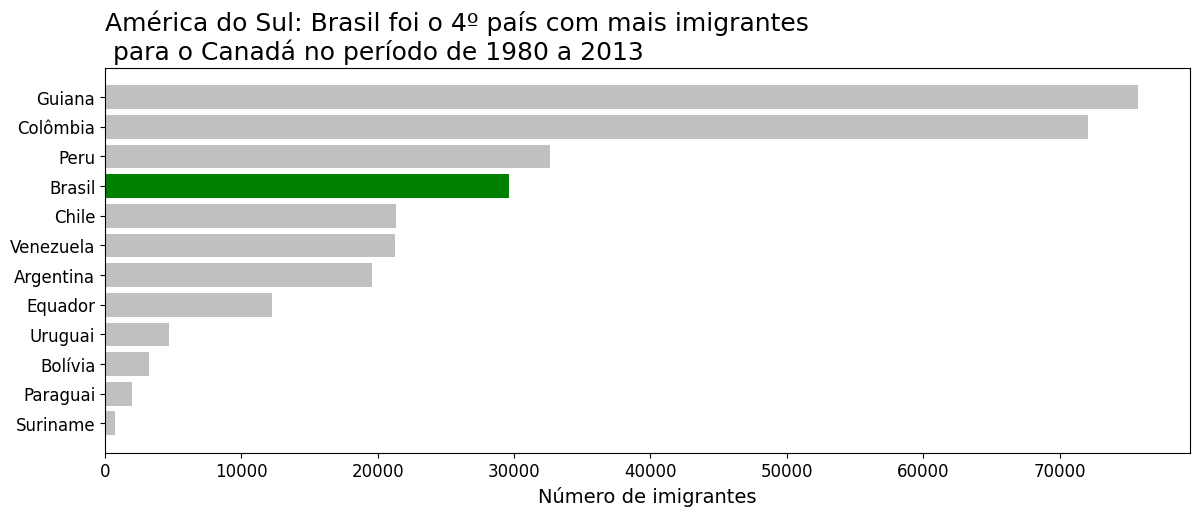

In [ ]:
# Como destacar um país nesse gráfico

fig, ax = plt.subplots(figsize = (14,5))

#Podemos criar um comando para alterar a cor
cores = []
for pais in america_sul_sorted.index:
  if pais == 'Brasil':
    cores.append('green')
  else:
    cores.append('silver')

ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color = cores)

#alterando o titulo do grafico
ax.set_title('América do Sul: Brasil foi o 4º país com mais imigrantes \n para o Canadá no período de 1980 a 2013', loc = 'left', fontsize = 18)
ax.set_xlabel('Número de imigrantes', fontsize = 14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

###Adicionando anotações em um gráfico

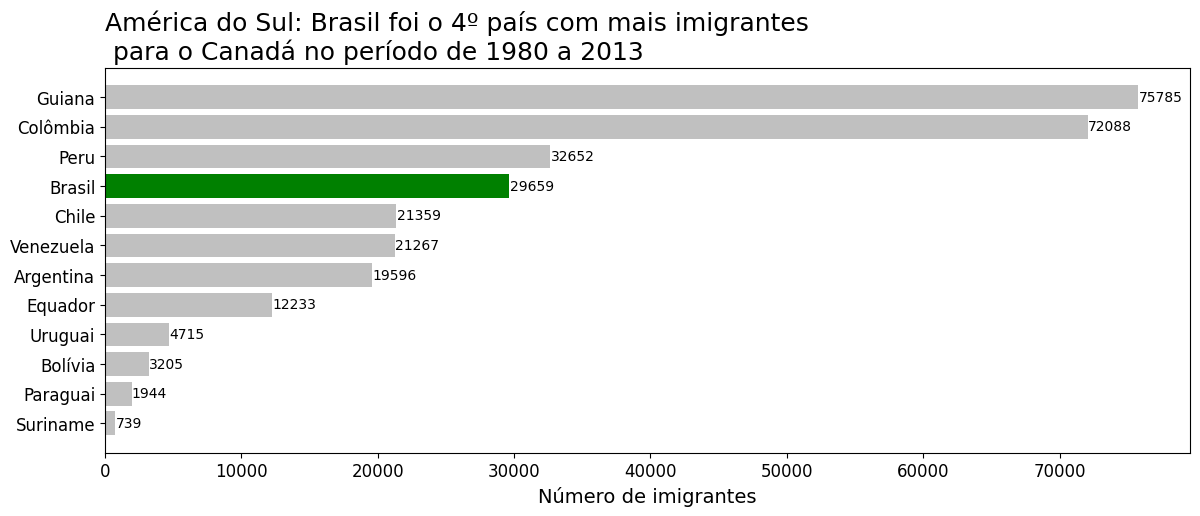

In [ ]:
# posso acrescentar anotações nas barras


fig, ax = plt.subplots(figsize = (14,5))
cores = []
for pais in america_sul_sorted.index:
  if pais == 'Brasil':
    cores.append('green')
  else:
    cores.append('silver')
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color = cores)
ax.set_title('América do Sul: Brasil foi o 4º país com mais imigrantes \n para o Canadá no período de 1980 a 2013', loc = 'left', fontsize = 18)
ax.set_xlabel('Número de imigrantes', fontsize = 14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# Posso criar uma função enumerate na coluna de valor total

for i, v in enumerate(america_sul_sorted['Total']):
  ax.text(v+20, i, str(v), color ='black', fontsize=10, ha='left', va = 'center')

  #(v+20) indica onde o texto vai ser adicionado em cada barrinha
  #i é a posição y n texto
  #str(v) converte o tamanho de cada barra em um str
  #ha alinhamento horizontal do texto
  #va define o alinhamento vertical do texto

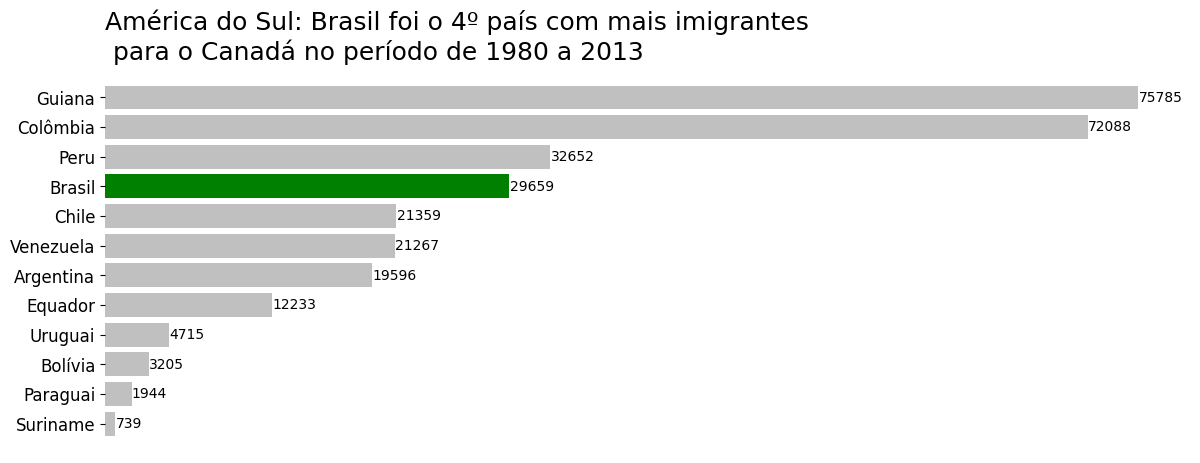

In [ ]:
# Removendo o frame do gráfico e removendo o eixo y, pois os dados ja estao em cada barra
# Removendo os ticks ao lado de cada pais


fig, ax = plt.subplots(figsize = (14,5))
cores = []
for pais in america_sul_sorted.index:
  if pais == 'Brasil':
    cores.append('green')
  else:
    cores.append('silver')
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color = cores)
ax.set_title('América do Sul: Brasil foi o 4º país com mais imigrantes \n para o Canadá no período de 1980 a 2013', loc = 'left', fontsize = 18)
ax.set_xlabel('Número de imigrantes', fontsize = 14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
for i, v in enumerate(america_sul_sorted['Total']):
  ax.text(v+20, i, str(v), color ='black', fontsize=10, ha='left', va = 'center')

  #removendo o frame
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
plt.show()

# removendo os ticks (deixando comprimento =0) (which pergunta se é pra tirar tanto do eixo x qt y)
ax.tick_params(axis ='both', which = 'both', length=0 )
plt.show()

### Salvando os gráficos

In [ ]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


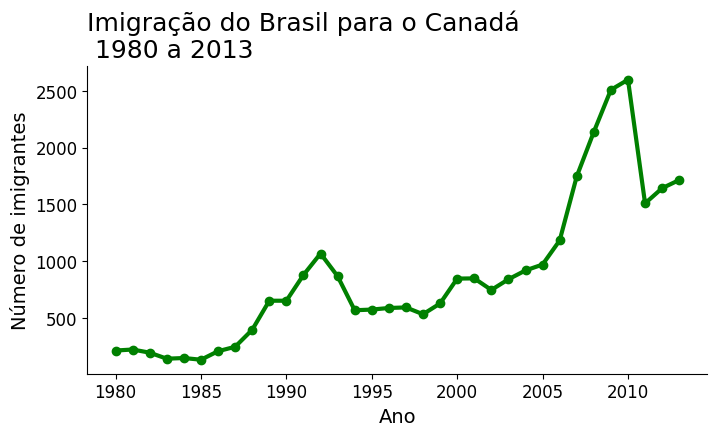

In [ ]:
# acima é apresentado um dicionario que informa quais os tipos de arquivo que podemos salvar nosso grafico
# Basta acrescentar esse print no grafico que vc quer salvar

# EXEMPLO

fig, ax = plt.subplots(figsize = (8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, marker = 'o', color ='g')
ax.set_title('Imigração do Brasil para o Canadá \n 1980 a 2013', fontsize= 18, loc = 'left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# removendo os frames da lateral direita e de cima
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# salvando o grafico
  # para deixar o fundo branco podemos acrescentar o transparent = false
  # bbox_inches ajustaos limites da figura ao grafico
fig.savefig('imigracao_brasil_canada.png', transparent = False, dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
# A figura fica salva no menu lateral esquerto, nos arquivos.
# Só clicar nele para fazer o download ou abrir

# Aula 04: Criando gráfico com Seaborn

In [ ]:
import seaborn as sns


In [ ]:
#adicionando o tema padrao de fundo, que será aplicado aos proximos graficos (se n mudar)
sns.set_theme()

### Primeiro gráfico

In [ ]:
# EXEMPLO DE TOP10 países com maiores imigrações

top_10 = df.sort_values('Total', ascending = False).head(10)
top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


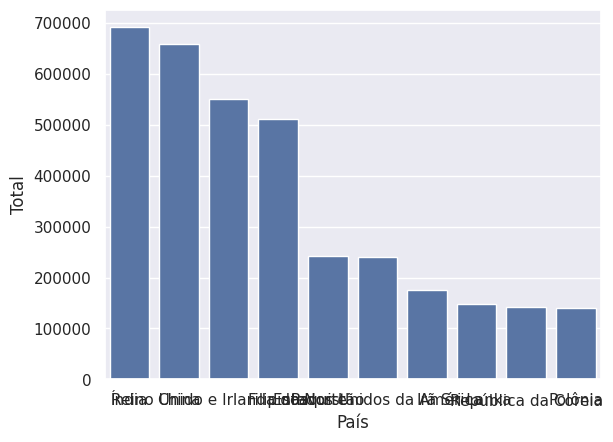

In [ ]:
#gerando grafico de barras com os valores totais

sns.barplot(data = top_10, x= top_10.index, y = 'Total')
plt.show()

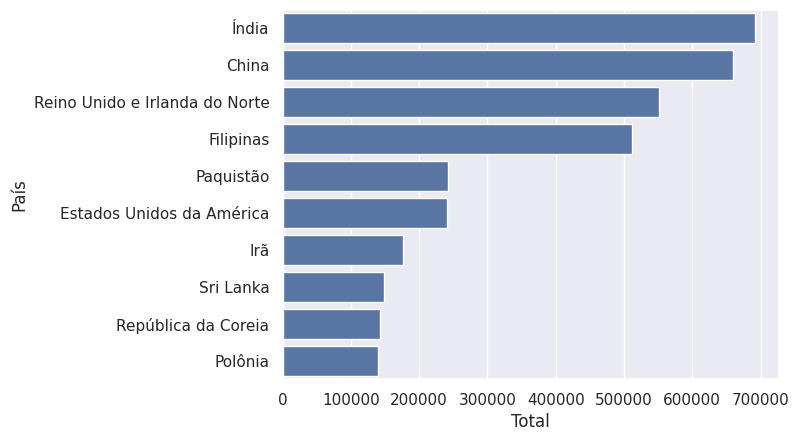

In [ ]:
# O grafico acima ficou com os rótulos ruins! Precisamos arrumar transformando em barras horizontais!
  # mudei os eixos e acrescentei a orientação
sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h')
plt.show()



## Customização do gráfico

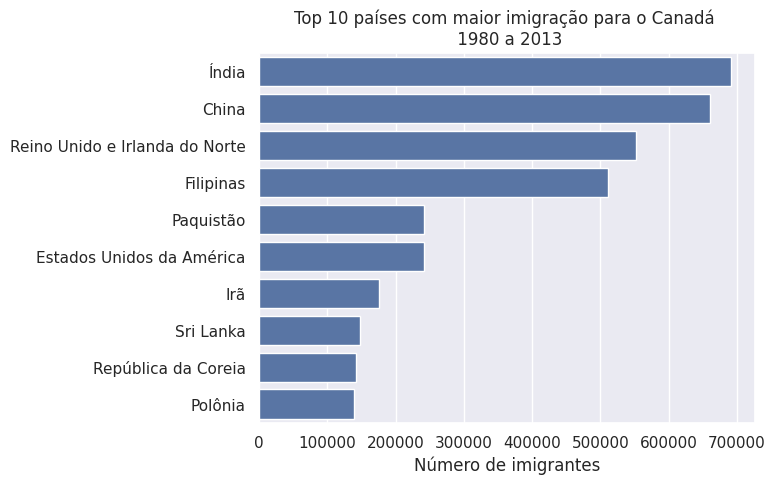

In [ ]:
# Adicionando um título ao gráfico e rótulos

ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h')
ax.set(title='Top 10 países com maior imigração para o Canadá \n 1980 a 2013',
       xlabel = 'Número de imigrantes',
       ylabel = '')
plt.show()

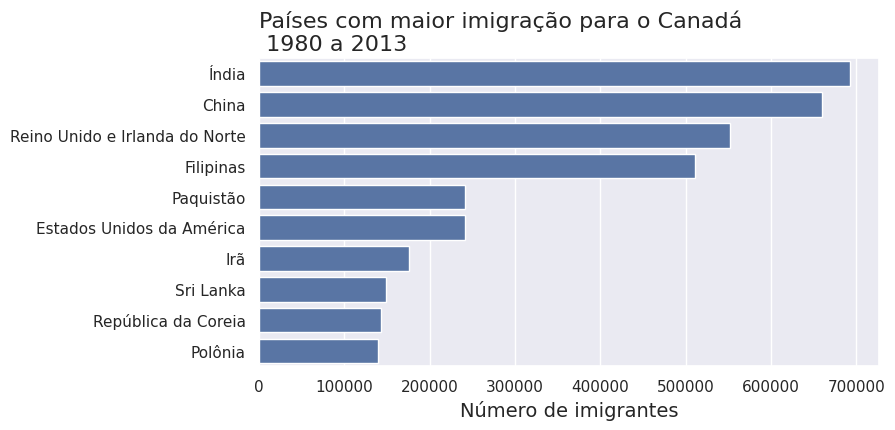

In [ ]:
# Ajustando o tamanho e localização do título
  # Para isso preciso mexer na FIGURA, que deve ser feito da seguinte maneira

fig, ax = plt.subplots(figsize = (8,4))
ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h')

ax.set_title('Países com maior imigração para o Canadá\n 1980 a 2013', loc = 'left', fontsize = 16)
ax.set_xlabel('Número de imigrantes', fontsize = 14)
ax.set_ylabel('')
plt.show()

### Usando diferentes tipos de paletas de cores

<ipython-input-48-e22c5be3cbc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)


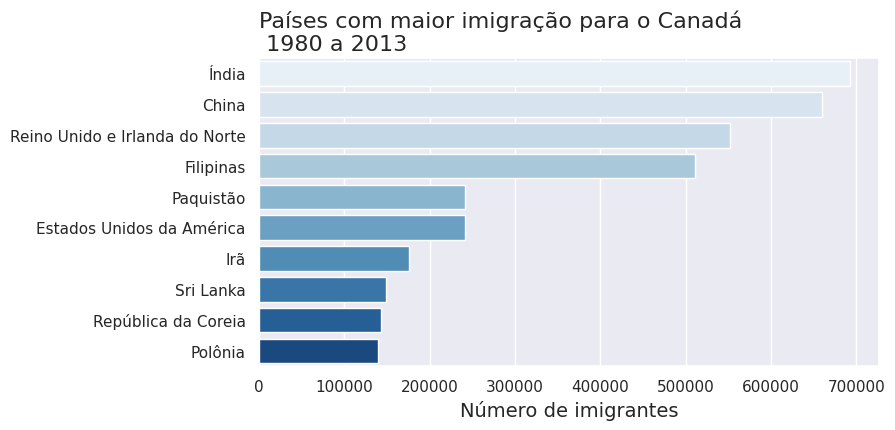

In [ ]:
#Criando função para estabelecer um grafico com paleta

def gerar_grafico_paleta(palette):
  fig, ax = plt.subplots(figsize = (8,4))
  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)
  ax.set_title('Países com maior imigração para o Canadá\n 1980 a 2013', loc = 'left', fontsize = 16)
  ax.set_xlabel('Número de imigrantes', fontsize = 14)
  ax.set_ylabel('')
  plt.show()

# As paletas de cores podem ser visualizadas no site do seaborn
# Para estabelecer a paleta, basta acrescentar qual paleta do site vc se interessou mais

gerar_grafico_paleta('Blues')

<ipython-input-48-e22c5be3cbc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)


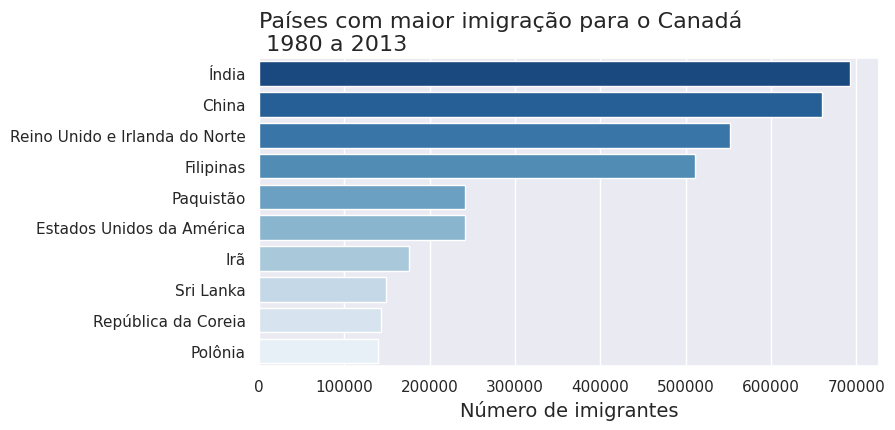

In [ ]:
# Caso vc queira alterar a posição das cores, basta utilizar o reverso

gerar_grafico_paleta('Blues_r')

<ipython-input-48-e22c5be3cbc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)


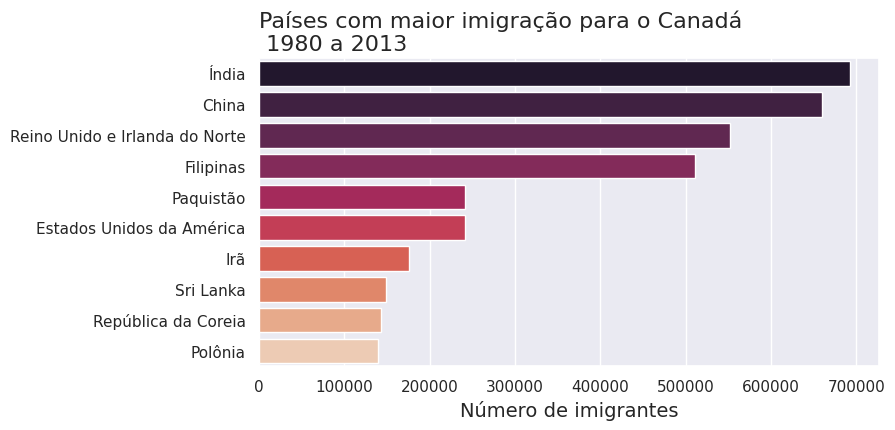

In [ ]:
# Podemos usar uma paleta divergente

gerar_grafico_paleta('rocket')

<ipython-input-48-e22c5be3cbc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)


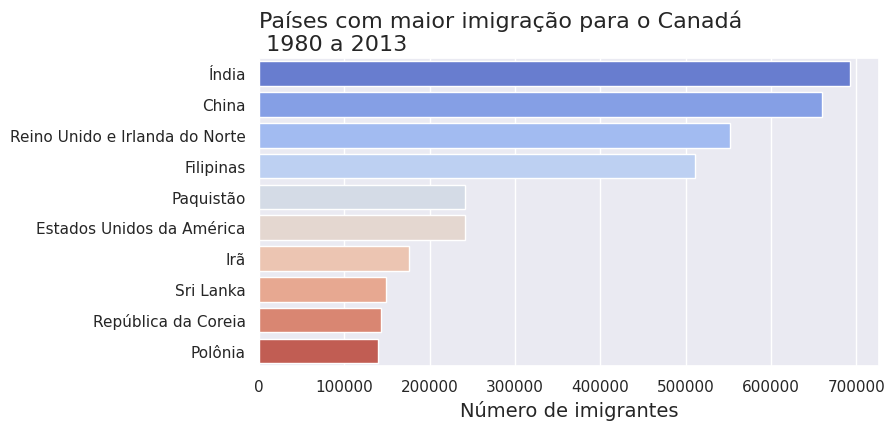

In [ ]:
# outro exemplo

gerar_grafico_paleta('coolwarm')

<ipython-input-48-e22c5be3cbc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)


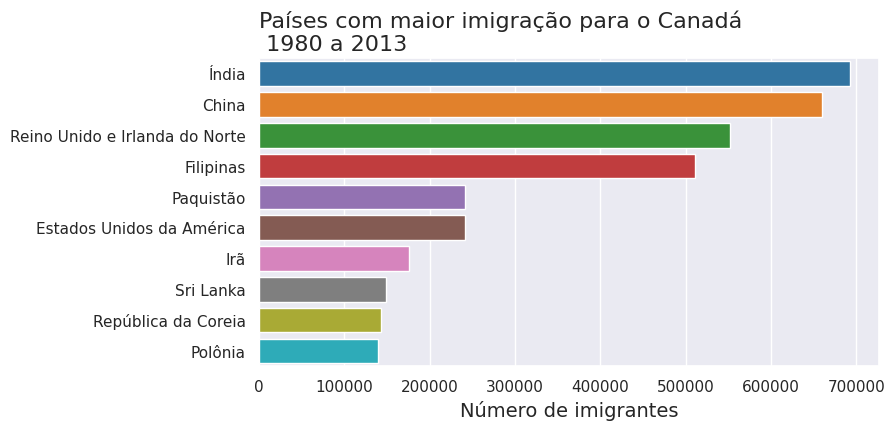

In [ ]:
# Paletas categóricas

gerar_grafico_paleta('tab10')

### Explorando temas da biblioteca Seaborn

<ipython-input-48-e22c5be3cbc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)


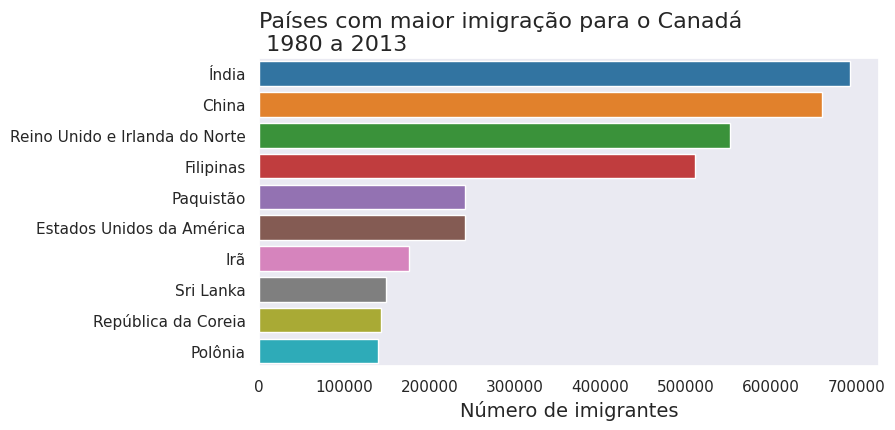

In [ ]:
#Fundo sem os grids
sns.set_theme(style = 'dark')
gerar_grafico_paleta('tab10')


<ipython-input-48-e22c5be3cbc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)


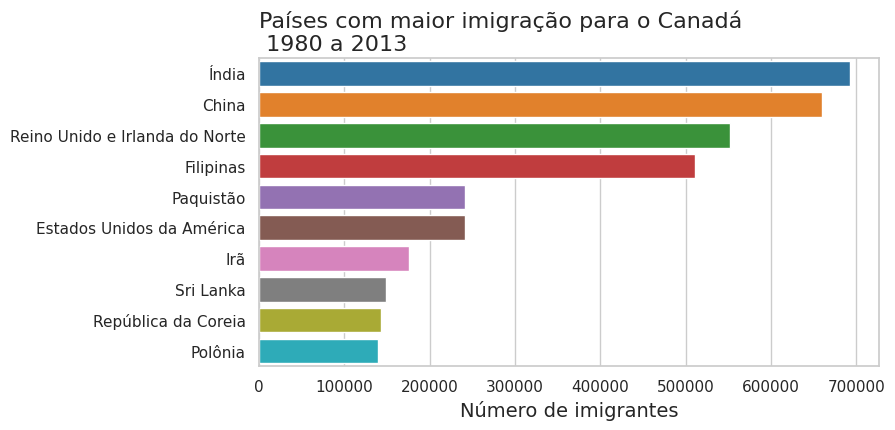

In [ ]:
# Fundo branco e linhas
sns.set_theme(style = 'whitegrid')
gerar_grafico_paleta('tab10')

<ipython-input-48-e22c5be3cbc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)


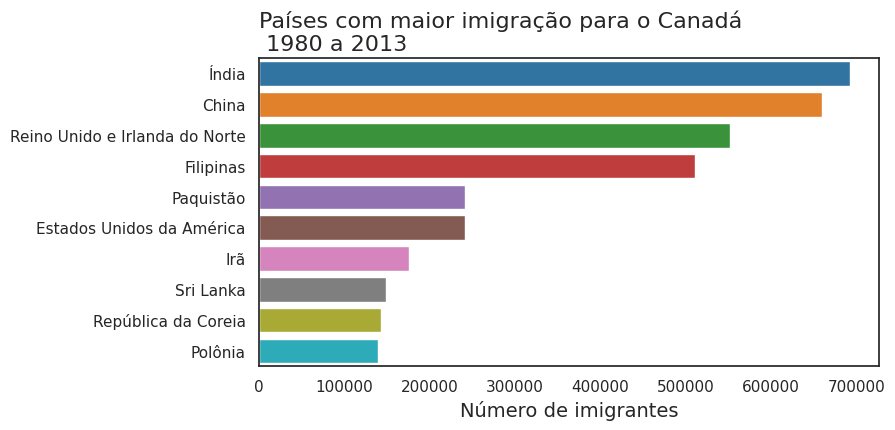

In [ ]:
# Tema branco sem nenhuma linha
sns.set_theme(style = 'white')
gerar_grafico_paleta('tab10')

<ipython-input-48-e22c5be3cbc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = palette)


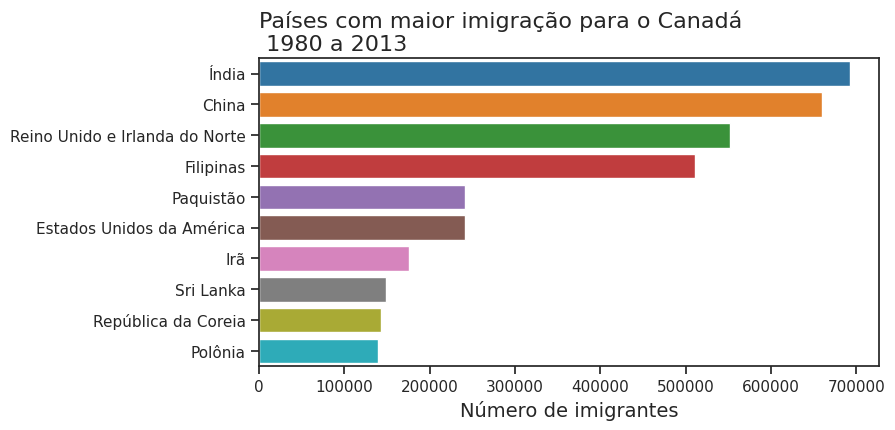

In [ ]:
#Tema Ticks (com marcações nos eixos x e y)
sns.set_theme(style = 'ticks')
gerar_grafico_paleta('tab10')

<ipython-input-61-0bfd571441d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = 'tab10')


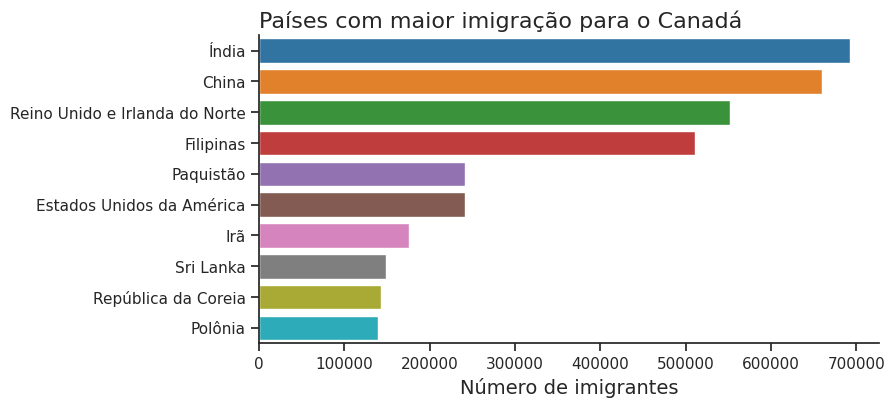

In [ ]:
#Removendo os Frames (Precisa ser em figura!) -> sns.despine
fig, ax = plt.subplots(figsize = (8,4))
ax = sns.barplot(data=top_10, x = 'Total', y = top_10.index, orient = 'h', palette = 'tab10')
ax.set_title('Países com maior imigração para o Canadá', loc = 'left', fontsize = 16)
ax.set_xlabel('Número de imigrantes', fontsize = 14)
ax.set_ylabel('')
sns.despine()

plt.show()

### Desafio Aula 04

Nesta etapa, seu desafio é criar uma figura contendo as tendências de imigração dos 4 maiores países da América latina: Brasil, Argentina, Peru e Colômbia. Através dessa criação você pode explorar diversas possibilidades e reconhecer de forma atrativa o seu processo de desenvolvimento.E não nos esqueçamos das orientações! Essa figura precisa ter uma linha para cada país, título, rótulos nos eixos, cores apropriadas, um tema da biblioteca Seaborn e legenda. Por isso, pense nas questões de acessibilidade, como tamanho das fontes e espessura das linhas. É importante escolher cores adequadas que não causem cansaço visual ou dificultem a leitura das informações. Além disso, o tamanho das fontes deve ser legível o suficiente para que as pessoas possam interpretar os dados com facilidade.

In [ ]:
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


In [ ]:
# Criando o DataFrame com os maiores paises da america latina

df_america = america_sul.loc[['Brasil', 'Argentina', 'Peru', 'Colômbia']]
df_america

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [ ]:
#Transpondo o DF
df_america = df_america.T

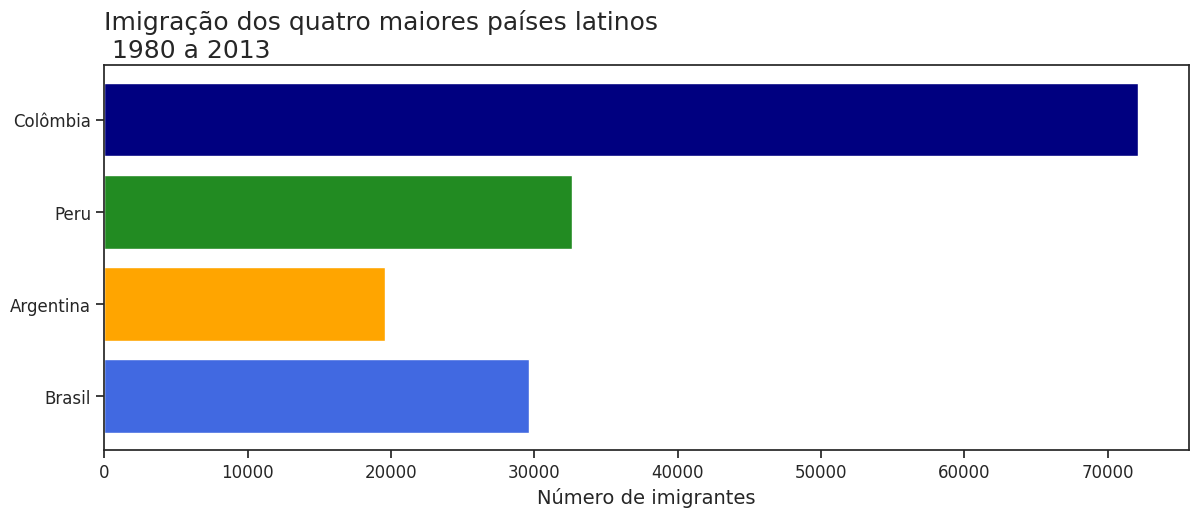

In [ ]:
#Plotar o grafico do numero total de imigraçoes para estes 4 países (Sem usar o Seaborn!!!)

fig, ax = plt.subplots(figsize = (14,5))

# Criando uma lista de cores
cores = ['royalblue', 'orange', 'forestgreen','navy',]

# Pegando os dados gerais e colocando-os no grafico
ax.barh(df_america.index, df_america['Total'], color = cores)

#título para grafico
ax.set_title('Imigração dos quatro maiores países latinos \n 1980 a 2013', loc = 'left', fontsize = 18)

# rótulos
ax.set_xlabel('Número de imigrantes', fontsize = 14)
ax.set_ylabel('')

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

<ipython-input-94-8e6026914bac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=latinos_sorted, x = 'Total', y = latinos_sorted.index, orient = 'h', palette = 'Blues_r')


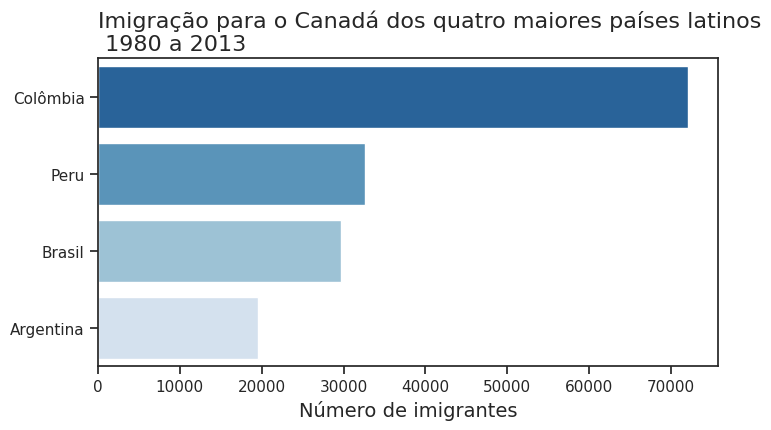

In [ ]:
# Usando o seaborn
# ajustando do maior para o menor

latinos_sorted = df_america.sort_values('Total', ascending = False)

fig, ax = plt.subplots(figsize = (8,4))
ax = sns.barplot(data=latinos_sorted, x = 'Total', y = latinos_sorted.index, orient = 'h', palette = 'Blues_r')
ax.set_title('Imigração para o Canadá dos quatro maiores países latinos\n 1980 a 2013', loc = 'left', fontsize = 16)
ax.set_xlabel('Número de imigrantes', fontsize = 14)
ax.set_ylabel('')

plt.show()



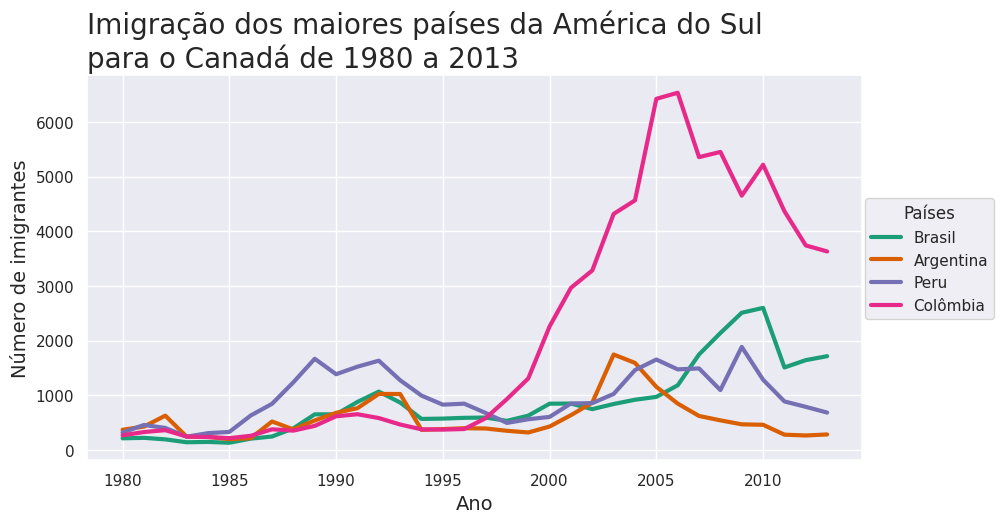

In [ ]:
# Outra possibilidade

sns.set_theme()
sns.set_palette('Dark2')

#Criando a Figura
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(df_america.loc['Brasil', anos], label='Brasil', lw=3)
ax = sns.lineplot(df_america.loc['Argentina', anos], label='Argentina', lw=3)
ax = sns.lineplot(df_america.loc['Peru', anos], label='Peru', lw=3)
ax = sns.lineplot(df_america.loc['Colômbia', anos], label='Colômbia', lw=3)

#ajustando rótulos
ax.set_title('Imigração dos maiores países da América do Sul\npara o Canadá de 1980 a 2013', loc='left', fontsize=20)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

#acrecentando legendas
ax.legend(title='Países', loc='upper right', bbox_to_anchor=(1.18, 0.7))

plt.show()

# Aula 04 - Criando gráficos interativos

## Primeiro Gráfico

In [ ]:
# Importando biblioteca
import plotly.express as px

In [ ]:
# Criando a Figura

#aqui já podemos definir o titulo da figura
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title = 'Imigração do Brasil para o Canadá entre 1980 e 2014',)

#alterando o layout do gráfico
  # rotacionando o rotulo do eixo x
  # Podemos mudar o rótulo
  # podemos mudar as fontes
fig.update_layout(width = 1000, height = 500,
                  xaxis={'tickangle': -45 },
                  font_family = 'Arial',
                  font_size = 14,
                  font_color = 'grey',
                  title_font_color = 'black',
                  title_font_size = 22,
                  xaxis_title = 'Ano',
                  yaxis_title = 'Número de imigrantes')


fig.show()

## Customização do gráfico

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title = 'Imigração do Brasil para o Canadá entre 1980 e 2014',)
# alterando a cor da linha
  #mudando a espessura line_width (em pixel)
fig.update_traces(line_color = 'green', line_width=4)

# alterando o tamanho do grafico

fig.update_layout(width = 1000, height = 500,
                  xaxis={'tickangle': -45 },
                  font_family = 'Arial',
                  font_size = 14,
                  font_color = 'grey',
                  title_font_color = 'black',
                  title_font_size = 22,
                  xaxis_title = 'Ano',
                  yaxis_title = 'Número de imigrantes')
fig.show()

## Acrescentando vários dados em um único gráfico interativo

In [ ]:
america_sul.head()

# precisamos remover as colunas de continente, regiao e total, pois n sao uteis para nós

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [ ]:
# Removendo as colunas
  # No comando drop, preciso estabelecer o axis (regial que quero tirar. Se =1 elimino coluna, se =2 elimino linhas)
df_america_sul_clean = america_sul.drop(['Continente', 'Região', 'Total'], axis = 1)

#Precisamos transport a tabela

america_sul_final = df_america_sul_clean.T
america_sul_final.head()

País,Argentina,Bolívia,Brasil,Chile,Colômbia,Equador,Guiana,Paraguai,Peru,Suriname,Uruguai,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142


In [ ]:
# Criando o gráfico interativo

fig = px.line(america_sul_final, x = america_sul_final.index, y = america_sul_final.columns, color = 'País',
              title = 'Imigração dos países da América do Sul para o Canadá entre 1980 e 2013', markers = True)

fig.update_layout(
    xaxis={'tickangle': -45 },
    xaxis_title = 'Ano',
    yaxis_title = 'Número de imigrantes',
    font_family = 'Arial',
    font_size = 14,
    font_color = 'grey',
    title_font_color = 'black',
    title_font_size = 22,
)

## Salvando gráficos em HTML

In [ ]:
# Salvando

fig.write_html('Imigração_america_sul.html')

In [ ]:
# Está salvo na pastinha da barra lateral, só salvar!

# Extra: Criando gráfico animado

In [ ]:
# Utilizando os dados do Brasil, precisamos alterar o tipo de dados de str para int

dados_brasil['ano'] = dados_brasil['ano'].astype(int)

#Para criar animação é preciso importar um módulo da bibliotecaPlotly
import plotly.graph_objs as go

# Criando uma figura vazia
fig = go.Figure()

In [ ]:
# Criando uma linha no grafico
  # o objeto Scatter recebe os argumentos para o eixo x e y,
  # iloc[0] seleciona o primeiro valor das colunas ano e imigrantes do brasil, respectivamente
  # precisamos definir o modo de visualização dos dados, neste caso em linhas (lines)
  #define-se a espessura da linha utilizando o dicionario
fig.add_trace(
    go.Scatter(x=[dados_brasil['ano'].iloc[0]], y=[dados_brasil['imigrantes'].iloc[0]], mode='lines', name='Imigrantes', line=dict(width=4))
)

In [ ]:
# Atualizando as configurações do eixo X e Y

#definindo as configurações de layout
fig.update_layout(
    title=dict(
        text='<b>Imigração do Brasil para o Canadá no período de 1980 a 2013</b>',
        x=0.12, #define posição horizontal do titulo no layout, em relação à largura da figura. 0.12 = 12% da largura da fig
        xanchor='left', #define o alinhamento horizontal do titulo
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Ano</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de imigrantes</b>'),
    updatemenus=[dict(
        type='buttons', #define que menu seá composto por botoes
        showactive=False, #define que nenhum botao estará ativo inicialmente
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )], #define o botao que sera exibido no menu. Este botao tem uma etiqueta "Play" que é exibido no proprio botao. O metodo animate é usado para ativar a animacao
        #dos dados. O argumento args é uma lista que contem dois elemetos:
          #None (indicando que nenhuma camada/trace do grafico é afetada pela animação),
          #Dicionario (que especifica os parametros da animação)
        # O parametro frame indica a duraaço de cada quadro da animação e atualizacao de caada quadro
          # O fromcurrent define se o quadro atual deve ser mantido ou se a animaçao deve ser iniciada do primeiro quadro
    width=1000,
    height=500
)

# Definir as configurações de animação
frames = [go.Frame(data=[go.Scatter(x=dados_brasil['ano'].iloc[:i+1], y=dados_brasil['imigrantes'].iloc[:i+1])]) for i in range(len(dados_brasil))]

    #frames é uma lista de objetos Frame do Plotly, que contem as infos dos dados para cada quadro de animação.
      # Cada quadro é representado por um objeto frame que contém um único trace, que é um obeto Scatter. No caso deósdte cigo, cada Scatter representa um ponto no grafico
        #onde X é o ano e Y e o n de imigrantes

    # O loop for é usado para criar um objeto Frame para cada ano no conjunto de dados, até o ultimo ano. O metodo iéuloc sado para selecionar os valores do DataFrame dados_brasil
      # a partir do indice 0 até o indice atual i+1, o que significa que cada quadro dãao animaç adiciona um ponto adicional aoã grafico.
      #A interaço, a lista de frames é preenchida com um novo objeto Frame

fig.frames = frames
    # A lista frames é atribuida a propriedade frames do objeto Figure (fig) criado anteriormente. Isso permide que a aanimação seja exibida no gráfico
      # quando o botao de controle de animaãçoe  pressionado. Cada frame contem os dados do grafico para determinado ano e é exibido em sequencia quando Play é apertado

# Mostrando a figura
fig.show()
  # funçao para exibir o grafico animado no nottbook


### Desafio EXTRA

Lembra que nós criamos uma figura estática contendo os dados de imigração do Brasil e Argentina? Sua tarefa é criar um gráfico animado com o Plotly que mostre esses dados. O gráfico deve ter as seguintes características:

Duas linhas: uma para o Brasil e outra para a Argentina.
Um botão "Play" para iniciar a animação, mostrando o aumento ou diminuição do número de imigrantes ao longo dos anos.
As configurações de animação devem fazer com que as duas linhas sejam exibidas e animadas ao mesmo tempo.

Dicas:

* Crie um DataFrame com os dados da Argentina e não se esqueça de deixar a coluna de anos no tipo int(inteiro).
* Use o código fornecido para o Brasil como base e adapte-o para incluir os dados da Argentina.
* Para configurar as animações você pode fazer um Loop for para percorrer o DataFrame dados_brasil e para cada iteração, criar uma nova lista contendo dois objetos do tipo go.Scatter, um para cada país. Em seguida, cada lista pode ser usada para criar um objeto go.Frame, que é adicionado à lista de frames. Por fim, a lista de frames pode ser atribuída ao objeto fig, que é a figura do gráfico a ser animado. Com isso, quando a animação for iniciada, o gráfico exibirá as duas linhas em movimento, uma para o Brasil e outra para a Argentina.